In [1]:
# import packages and modules
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.3.1


In [2]:
# set input feature number 
num_inputs = 2
# set example number
num_examples = 1000

# set true weight and bias in order to generate corresponded label
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,
                      dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

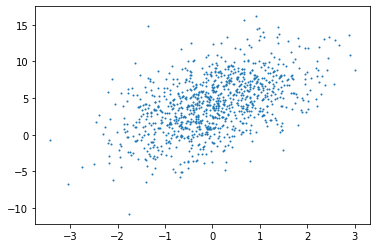

In [26]:
# 可视化生成的数据
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)
plt.show()

In [18]:
#读取数据集
#生成器函数
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [24]:
#查看迭代器内容
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.0723, -0.0714],
        [-0.4591,  0.3129],
        [-0.8891,  0.2572],
        [-0.3065,  0.3007],
        [ 0.1581, -0.3149],
        [ 0.0260,  1.5743],
        [-1.7513,  3.3856],
        [-0.5016,  1.5791],
        [-0.0220, -0.2955],
        [ 0.0836,  0.8702]]) 
 tensor([  4.5879,   2.2027,   1.5317,   2.5761,   5.5926,  -1.0848, -10.8155,
         -2.1622,   5.1501,   1.4233])


In [28]:
#初始化参数 w, b
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32,requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [29]:
#模型（简单线性回归）
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [64]:
#损失函数
def squared_loss(y_hat, y):
#     print(y_hat.shape,y.shape)
    return (y_hat.view(-1) - y) ** 2 / 2

In [31]:
#min-batch gradient
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # ues .data to operate param without gradient track

In [65]:
# super parameters init
lr = 0.03
num_epochs = 5

net = linreg
loss = squared_loss

# training
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  
        # calculate the gradient of batch sample loss 
        l.backward()  
        # using small batch random gradient descent to iter model parameters
        sgd([w, b], lr, batch_size)  
        # reset parameter gradient
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.017117
epoch 2, loss 0.000095
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051


In [66]:
w,b

(tensor([[ 2.0004],
         [-3.3993]], requires_grad=True), tensor([4.1999], requires_grad=True))